In [5]:
#https://matplotlib.org/gallery/color/named_colors.html
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
from scipy import stats

In [7]:
from scipy.stats import kurtosis, skew

%matplotlib inline

In [12]:
path =r"D:\OneDrive\Documents\Python Scripts\oil_exxon.xlsx"
price_data = pd.read_excel(path)

# set the index equal to the date column & then drop the old date column
price_data.index = pd.to_datetime(price_data['date'])
price_data = price_data.drop(['date'], axis = 1)

# print the first five rows
price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [13]:
#STEP 3 CLEANING THE DATA
# check the data types, in this case everthing looks fine no changes needed. 
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [14]:
#define the new name variable using dictionary
new_column_names = {'exon_price':'exxon_price'}

#rename the column
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [17]:
#Check for missing values
display(price_data.isna().any())

#drop any missing values
price_data = price_data.dropna()

#Verify there are no missing values
display(price_data.isna().any())

exxon_price    False
oil_price      False
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

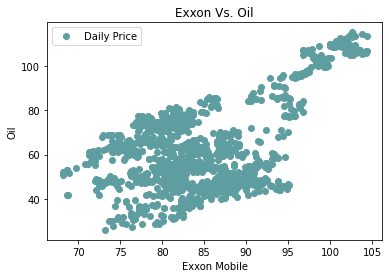

In [19]:
#STEP 4: Explore the Data
#define the x and y data
x = price_data['exxon_price']
y = price_data['oil_price']

#create the scatter plot
plt.plot(x, y, 'o', color='cadetblue', label = 'Daily Price')

#make sure plot is formatted.
plt.title("Exxon Vs. Oil")
plt.xlabel("Exxon Mobile")
plt.ylabel("Oil")
plt.legend()

plt.show()


In [20]:
#Measuring the Correlation
#built in corr function
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [21]:
#Statistical summary 
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

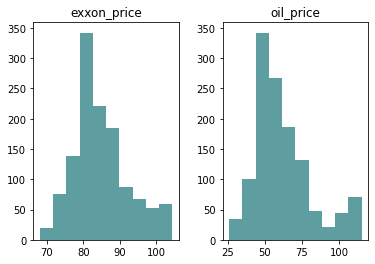

In [22]:
#Checking for Outliers and Skewness
price_data.hist(grid = False, color = 'cadetblue')

In [27]:
#calculate the excess kurtosis using fischer method. alternatively the Pearson method can be used
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

#Calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew =  skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis)) #good
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis)) #good
 
display("Exxon Skew {:.2}".format(exxon_skew)) #moderate skew
display("Oil Skew {:.2}.".format(oil_skew)) #moderate to high skew


'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew 0.66'

'Oil Skew 1.0.'

In [28]:
#perform a kurtosis test
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

#perform skew test
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159923e-35)

In [29]:
#SECTION 5: Building the Model
#Define the response and explanatory variables
Y = price_data.drop('oil_price', axis = 1) #Either method works for defining variable
X = price_data[['oil_price']] #                       "

#Split x and y into X_ using the sklearnmodel method
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=1)

In [30]:
#create a linear regression model object
regression_model = LinearRegression()

#pass through the X_train and y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [32]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [33]:
#Create a single prediction
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 85.95


In [34]:
#making multiple predictions at once
y_predict = regression_model.predict(X_test)

#show the 5 predictions
y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

In [36]:
#Section 6: Evaluating the model
#define our output
X2 = sm.add_constant(X)

#create an OLS model
model = sm.OLS(Y, X2)

#fit the data to the model
est = model.fit()

In [37]:
#confidence intervals
#make some confidence intervals to show certainty of sample data
est.conf_int() #default of 95%

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [38]:
#Hypothesis testing: If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0. If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.
#estimate the p-values
est.pvalues
#p-values is much less than alpha value of 0.05. Therefore we accept the alternative

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [39]:
#Section 7: How well does the model fit?
#calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

#calculate the mean ablsolute error.
model_mae = mean_absolute_error(y_test, y_predict)

#calculate the root mean squared error.
model_rmse = math.sqrt(model_mse)

#display output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.4
MAE 5.03
RMSE 6.2


In [41]:
#Looking at R^2 values
model_r2 = r2_score(y_test, y_predict)
print("R2 {:.2}".format(model_r2))

R2 0.31


In [42]:
#print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Tue, 11 May 2021   Prob (F-statistic):          1.42e-123
Time:                        02:47:00   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

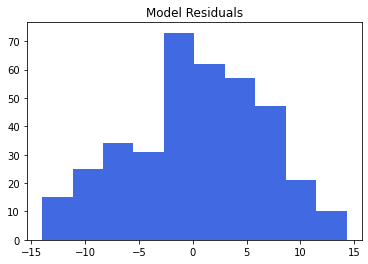

In [43]:
#Show residuals &and then call the hist() method
(y_test - y_predict).hist(grid=False, color = 'royalblue')
plt.title("Model Residuals")
plt.show

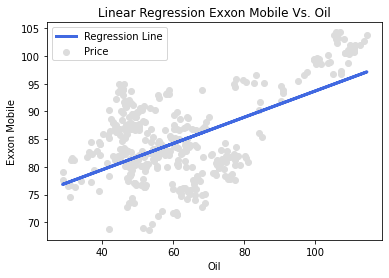

Oil coefficient:0.24
Mean squared error: 38.44
Root Mean squared error: 6.2
R2 score: 0.31


In [46]:
#plotting the line
plt.scatter(X_test, y_test,  color='gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color='royalblue', linewidth = 3, linestyle= '-',label ='Regression Line')

plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.legend()
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))


In [49]:
import pickle
#Save the model for future use
with open('my_linear_regression.sav', 'wb') as f:
    pickle.dump(regression_model, f)

#load it back in
with open('my_linear_regression.sav', 'rb') as f:
    regression_model_2 = pickle.load(f)

#make a new prediction
regression_model_2.predict([[67.33]])

array([[85.94980965]])